# <p style="text-align: center;"> Machine Learning Project </p>
# <p style="text-align: center;">Book Recommendation System</p>

# <p style="text-align: center;">Presented by : 
* Dridi Mariem
* Lachtar Nour
* Torjmen Sami
* Zakhama Fatma Zahra </p>


# <p style="text-align: center;">M2 Big Data & AI</p>

# 1. Business Understanding :

In this paper, we will present an introduction to a collaborative filtering machine learning project based on the book recommendation database. Our goal is to explain the three main tables of this database, namely "user", "rating" and "book", and to show how they can be used to create a personalized book recommendation system using collaborative filtering techniques.

The "user" table contains information about users, such as their unique identifier, name, and geographic location. This can help understand users' preferences and behaviors when interacting with books.

The "rating" table contains information about the ratings given by users to different books, scored from 0 to 10. This data can be used to understand users' preferences for book content.

The "book" table contains information about individual books, including their unique identifier, title, author and genre. This information can be used to understand the characteristics of the most popular books among users.

The issue with book recommendation systems is that they often rely on basic collaborative filtering techniques or content-based approaches, which can lead to limited recommendations and fail to capture the user's preferences accurately. Additionally, the lack of diversity in the recommended books may lead to user dissatisfaction and reduce the system's effectiveness.

To address these issues, researchers aim to develop more sophisticated recommendation algorithms that can capture users' preferences and recommend books that align with their interests. These algorithms may include machine learning models that use natural language processing to analyze the content of the books and identify their themes and topics. Additionally, incorporating user feedback and integrating social network analysis may help create more personalized and diverse recommendations.

=> Overall, the goal is to develop book recommendation systems that can provide accurate and diverse recommendations to users, enhancing their reading experiences and increasing engagement with the platform.

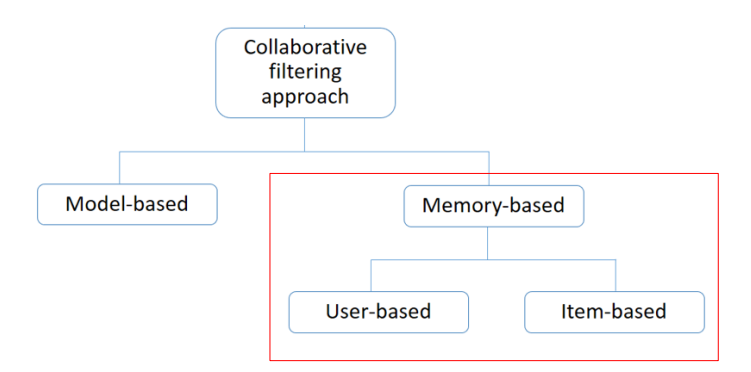

### Importing Libraries

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
palette = sns.color_palette("Set2")
import warnings
warnings.filterwarnings('ignore')

# 2. Data Collection

In [2]:
user=pd.read_csv("data/Users.csv")
book=pd.read_csv("data/Books.csv")
rating=pd.read_csv("data/Ratings.csv")

removed_books = 0
removed_ratings = 0
removed_users = 0

In [3]:
print('Number of books: ', book.shape[0])
book.head()

Number of books:  271360


ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [4]:
print('Number of ratings: ', rating.shape[0])
rating.head()

Number of ratings:  1149780


User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [5]:
print('Number of users: ', user.shape[0])
user.head()

Number of users:  278858


User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

## 3) Data Preparation

### 1) Table of Books  : 

In [6]:
book.rename(columns={'Book-Title':'title',"Book-Author":"author","Year-Of-Publication":'year',"Publisher":"publisher","Image-URL-S":"image_s","Image-URL-M":"image_m","Image-URL-L":"image_links"},inplace=True)
book.drop(columns=['image_s','image_m'], inplace=True)
book.reset_index(drop=True,inplace=True)
book.head()

ISBN                                              title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 author  year                   publisher  \
0    Mark P. O. Morford  2002     Oxford University Press   
1  Richard Bruce Wright  2001       HarperFlamingo Canada   
2          Carlo D'Este  1991             HarperPerennial   
3      Gina Bari Kolata  1999        Farrar Straus Giroux   
4       E. J. W. Barber  1999  W. W. Norton &amp; Company   

                                         image_links  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

#### 1) ISBN

L' ISBN des livres est composé de **10 chiffre**.

*Par exemple : "185326119x" ou "0393045218"*

In [7]:
for i in range(len(book)):
    if len(str(book.iloc[i,0]))!=10:
        print (book.iloc[i,:])
        print("_____________________________________________")

ISBN                                                0486404242\t
title          War in Kind: And Other Poems (Dover Thrift Edi...
author                                             Stephen Crane
year                                                        1998
publisher                                     Dover Publications
image_links    http://images.amazon.com/images/P/0486404242.0...
Name: 111808, dtype: object
_____________________________________________
ISBN                                               3518365479<90
title                    Suhrkamp TaschenbÃ?Â¼cher, Nr.47, Frost
author                                           Thomas Bernhard
year                                                        1972
publisher                                               Suhrkamp
image_links    http://images.amazon.com/images/P/3518365479.0...
Name: 171206, dtype: object
_____________________________________________
ISBN                                               3442248027  3
title  

Nous remarquons qu'il y a des ISBN qui contiennent des erreurs dans la base de données **Books**:

In [8]:
# Corrige les erreurs de ISBN:
book.iloc[251649,0]='0385722206'
book.iloc[251424,0]='3442248027'
book.iloc[171206,0]='3518365479'
book.iloc[111808,0]='0486404242'

In [9]:
# Remplacer les ISBN  _________X en _________x
book['ISBN'] = book['ISBN'].str.replace('X', 'x')


Nous remarquons qu'il y a des duplicats dans la base de données **Books**:

In [10]:
# Exemple des livres dupliqués
counts=book['ISBN'].value_counts()
for i, index in enumerate(counts[counts>1].index):
    print(book[book.iloc[:,0]==index].iloc[:,[1,2]])
    print("________________________________________________")
    if i > 5:
        break

                                          title           author
21723   The Jungle Book (Wordsworth Collection)  Rudyard Kipling
116461  The Jungle Book (Wordsworth Collection)  Rudyard Kipling
________________________________________________
                                                    title            author
3591    The Professor and the Madman: A Tale of Murder...  Simon Winchester
168738  The Professor and the Madman: A Tale of Murder...  Simon Winchester
________________________________________________
                   title       author
23122   The Greenlanders  Jane Smiley
162302  The Greenlanders  Jane Smiley
________________________________________________
                                                    title         author
21741   Alice In Wonderland Great Illustrated CL (Alic...  Lewis Carroll
200612  Alice In Wonderland Great Illustrated CL (Alic...  Lewis Carroll
________________________________________________
                                                

In [11]:
# Suppression des duplicats

print("Initial size: ",book.shape[0])
removed_books += book.shape[0] 

book = book.drop_duplicates(subset=['ISBN'])
book.reset_index(drop=True,inplace=True)

print("Size after removing duplicates: ",book.shape[0])
removed_books -= book.shape[0] 

print("Total removed books from the original dataset: ",removed_books)

Initial size:  271360
Size after removing duplicates:  271044
Total removed books from the original dataset:  316


#### 2) Author & Publisher

Nous remarquons que nous avons des valeurs manquantes pour les attributs *Author* ainsi que *Publisher*:

In [12]:
book.isnull().sum() 

ISBN           0
title          0
author         1
year           0
publisher      2
image_links    3
dtype: int64

In [13]:
# Afficher les livres qui ont des valeurs manquantes dans 'author'
book.loc[book["author"].isnull(),:]

ISBN                                              title author  \
187534  9627982032  The Credit Suisse Guide to Managing Your Perso...    NaN   

        year                       publisher  \
187534  1995  Edinburgh Financial Publishing   

                                              image_links  
187534  http://images.amazon.com/images/P/9627982032.0...

In [14]:
# Afficher les livres qui ont des valeurs manquantes dans 'publisher'
book.loc[book['publisher'].isnull(),:]

ISBN            title           author  year publisher  \
128811  193169656x      Tyrant Moon  Elaine Corvidae  2002       NaN   
128958  1931696993  Finders Keepers  Linnea Sinclair  2001       NaN   

                                              image_links  
128811  http://images.amazon.com/images/P/193169656X.0...  
128958  http://images.amazon.com/images/P/1931696993.0...

In [15]:
# Rajout manuel de l'auteur
book.author[book.ISBN == '9627982032'] = 'Larissa Anne Downes'

In [16]:
# Rajout manuel des publishers
book.publisher[book.ISBN == '193169656x'] = 'NovelBooks INC'
book.publisher[book.ISBN == '1931696993'] = 'CreateSpace Independent Publishing Platform'

#### 3) Year

Nous remarquons qu'il y a plusieurs incohérences dans l'attribut *Year*:

In [17]:
book['year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

On remarque déjà que des noms de publishers sont affectés à des dates. Si on regarde de plus près..

In [18]:
book.loc[(book['year'] == 'DK Publishing Inc') | (book['year'] =="Gallimard") ,:]

ISBN                                              title author  \
209344  078946697x  DK Readers: Creating the X-Men, How It All Beg...   2000   
220513  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   2003   
221454  0789466953  DK Readers: Creating the X-Men, How Comic Book...   2000   

                     year                                          publisher  \
209344  DK Publishing Inc  http://images.amazon.com/images/P/078946697X.0...   
220513          Gallimard  http://images.amazon.com/images/P/2070426769.0...   
221454  DK Publishing Inc  http://images.amazon.com/images/P/0789466953.0...   

       image_links  
209344         NaN  
220513         NaN  
221454         NaN

.. on observe qu'il manque l'auteur et que par conséquent toutes les colonnes après celui-çi sont décalées. Nous devons corriger ceci:

In [19]:
book[['year','publisher','image_links']] = book[['year','publisher', 'image_links']].mask((book['year'] == 'Gallimard') | (book['year'] == 'DK Publishing Inc'), book[['author','year','publisher']].values)

Ici, nous avons simplement appliqué un masque au lignes contenant les 3 lignes à décaler précédemment

In [20]:
# Ajout manuel des auteurs
book.loc[209344 ,'author'] = 'Michael Teitelbaum'
book.loc[221454 ,'author'] = "James Buckley"
book.loc[220513 ,'author'] =  "Jean-Marie Gustave Le Clézio"

A présent, le jeux de données **Books** ne contient plus de valeurs manquantes:

In [21]:
book.isnull().sum()

ISBN           0
title          0
author         0
year           0
publisher      0
image_links    0
dtype: int64

Si on regard de plus prêt les l'attribut *year* ..

In [22]:
book['year'] = book["year"].astype(int)
print(sorted(book.year.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


On constate que les dates supérieures à 2012 sont érronées. Il faut modifier ces dates, conforméments à la réalité.

In [23]:
book[book['year']>2012][["ISBN","year"]].values

array([['068160204x', 2020],
       ['0671746103', 2030],
       ['0671791990', 2030],
       ['0870449842', 2030],
       ['0140301690', 2050],
       ['068107468x', 2020],
       ['0140201092', 2050],
       ['0394701658', 2038],
       ['3442436893', 2026],
       ['0590085417', 2021],
       ['0870446924', 2030],
       ['0671266500', 2030],
       ['068471941x', 2020],
       ['0684718022', 2030],
       ['0380000059', 2024],
       ['068471809x', 2037],
       ['0671740989', 2030]], dtype=object)

In [24]:
#year >2012
correct_years=[1997,1991,1992,1999,1970,1998,1950,1959,1996,1974,1987,1961,1920,1971,1925,1937,1991]
for i,j in zip(book[book['year']>2012][["ISBN","year"]].values,correct_years):
    print(i,"---> correct year=",j)

['068160204x' 2020] ---> correct year= 1997
['0671746103' 2030] ---> correct year= 1991
['0671791990' 2030] ---> correct year= 1992
['0870449842' 2030] ---> correct year= 1999
['0140301690' 2050] ---> correct year= 1970
['068107468x' 2020] ---> correct year= 1998
['0140201092' 2050] ---> correct year= 1950
['0394701658' 2038] ---> correct year= 1959
['3442436893' 2026] ---> correct year= 1996
['0590085417' 2021] ---> correct year= 1974
['0870446924' 2030] ---> correct year= 1987
['0671266500' 2030] ---> correct year= 1961
['068471941x' 2020] ---> correct year= 1920
['0684718022' 2030] ---> correct year= 1971
['0380000059' 2024] ---> correct year= 1925
['068471809x' 2037] ---> correct year= 1937
['0671740989' 2030] ---> correct year= 1991


In [25]:
book['year'][book['year']>2012] = correct_years

In [26]:
# Solution avec boucle for
# for i,j in zip(book[book['year']>2012]["ISBN"].index,correct_years):
#     book.loc[i,'year']=j

In [27]:
book['year'][book['year']>2012].values

array([], dtype=int32)

Les dates au dessus de 2012 ont été corrigées. Il reste maintenant les dates inférieure à 1806

In [28]:
book[(book['year']<1806) & (book['year']>0)][["ISBN","year"]]

ISBN  year
227296  9643112136  1378
253457  964442011x  1376

In [29]:
book.loc[227296,"year"]=2010
book.loc[253457,"year"]=2011

In [30]:
# year ==0
book[book['year']==0]

ISBN                                              title  \
176     3150000335                                   Kabale Und Liebe   
188     342311360x                            Die Liebe in Den Zelten   
288     0571197639                        Poisonwood Bible Edition Uk   
351     3596214629       Herr Der Fliegen (Fiction, Poetry and Drama)   
542     8845229041  Biblioteca Universale Rizzoli: Sulla Sponda De...   
...            ...                                                ...   
270478  014029953x                         Foe (Essential.penguin S.)   
270597  0340571187                                     Postmens House   
270778  8427201079                           El Misterio De Sittaford   
270866  0887781721                                          Tom Penny   
270880  3150013763                                     Der Hofmeister   

                        author  year                           publisher  \
176                   Schiller     0     Philipp Reclam, Jun Verlag GmbH   
188     Gabriel Garcia Marquez     0  Deutscher Taschenbuch Verlag (DTV)   
288         Barbara Kingsolver     0                     Faber Faber Inc   
351                    Golding     0     Fischer Taschenbuch Verlag GmbH   
542                   P Coelho     0                  Fabbri - RCS Libri   
...                        ...   ...                                 ...   
270478            J.M. Coetzee     0                   Penguin Books Ltd   
270597        Maggie Hemingway     0                    Trafalgar Square   
270778         Agatha Christie     0                    Editorial Molino   
270866             Tony German     0                P. Martin Associates   
270880              Jakob Lenz     0     Philipp Reclam, Jun Verlag GmbH   

                                              image_links  
176     http://images.amazon.com/images/P/3150000335.0...  
188     http://images.amazon.com/images/P/342311360X.0...  
288     http://images.amazon.com/images/P/0571197639.0...  
351     http://images.amazon.com/images/P/3596214629.0...  
542     http://images.amazon.com/images/P/8845229041.0...  
...                                                   ...  
270478  http://images.amazon.com/images/P/014029953X.0...  
270597  http://images.amazon.com/images/P/0340571187.0...  
270778  http://images.amazon.com/images/P/8427201079.0...  
270866  http://images.amazon.com/images/P/0887781721.0...  
270880  http://images.amazon.com/images/P/3150013763.0...  

[4611 rows x 6 columns]

#### Exploration of book

Top 10 Authors which have written the most books.

In [31]:
book_year_count=book.groupby('year',as_index=False).count()[['year','ISBN']]
book_year_count=book_year_count[(book_year_count["year"]>1996) & (book_year_count["year"]<2004)]
book_year_count

year   ISBN
92  1997  14873
93  1998  15752
94  1999  17411
95  2000  17214
96  2001  17337
97  2002  17614
98  2003  14330

<AxesSubplot: xlabel='year', ylabel='ISBN'>

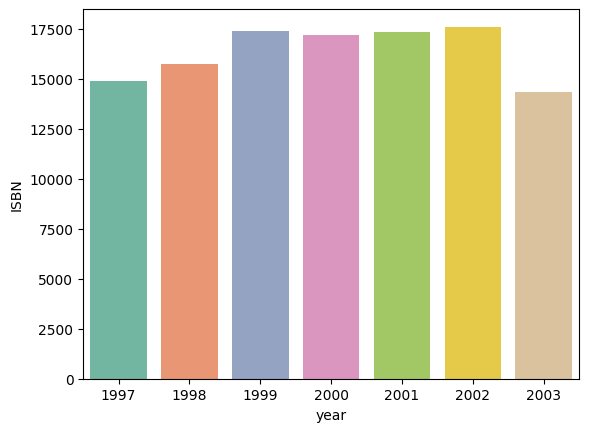

In [32]:
sns.barplot(data=book_year_count,x="year",y="ISBN",palette=palette)


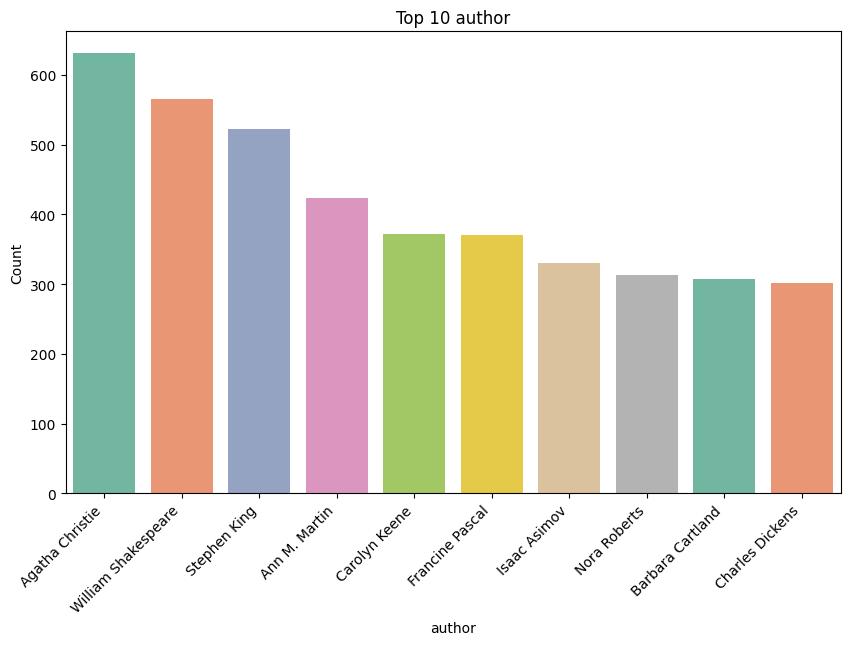

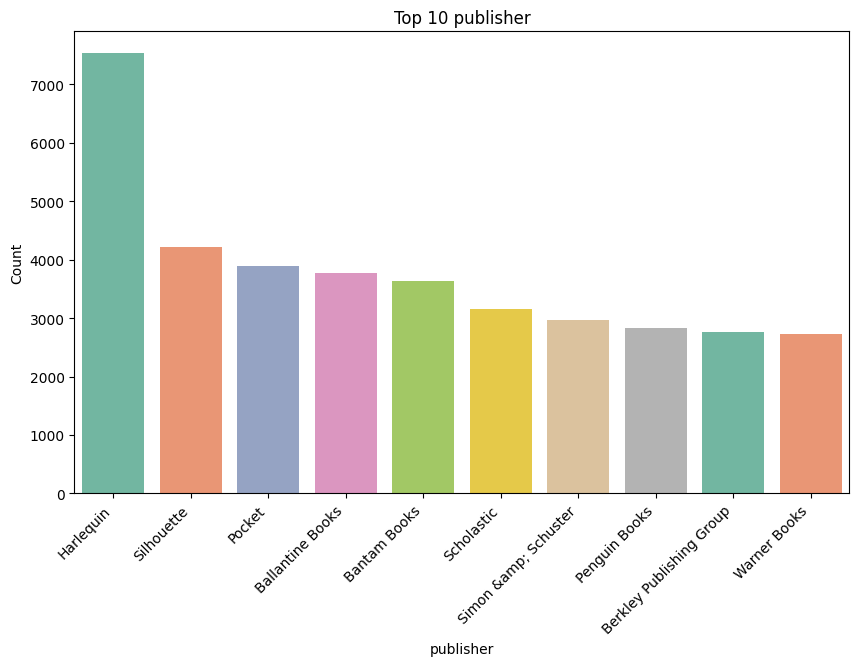

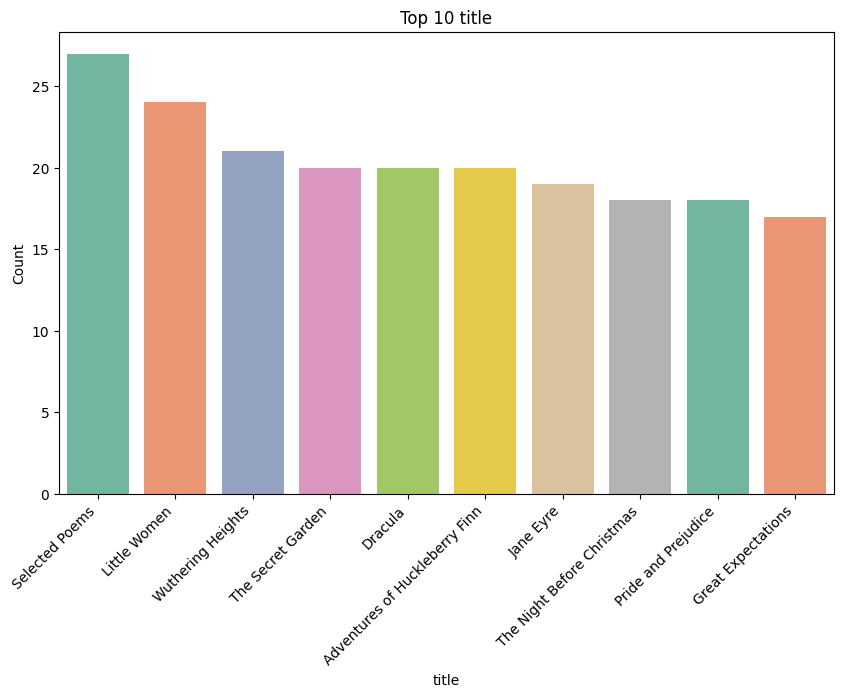

In [33]:
def plot_count(df, column_name):
    plot_column = df[column_name].value_counts()[0:10].reset_index()
    plot_column.columns = [column_name, 'Count']
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=column_name, y='Count', data=plot_column, palette=palette)
    ax.set_title("Top 10 " + column_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show()
plot_count(book,"author")
plot_count(book,"publisher")
plot_count(book,"title")

### *Google API Search ISBN*

Une fonction qui cherche le ISBN sur la base de google book et sur notre table Book

In [34]:
import urllib.request
import json
import textwrap
from dateutil.parser import parse
import datetime

def search_isbn(isbn):
    exist_in_book=isbn in book.ISBN.unique()
    if exist_in_book:
        info_book=book[book.ISBN==isbn]
    base_api_link = "https://www.googleapis.com/books/v1/volumes?q=isbn:"
    with urllib.request.urlopen(base_api_link + isbn) as f:
        text = f.read()
    decoded_text = text.decode("utf-8")
    obj = json.loads(decoded_text) # deserializes decoded_text to a Python object
    if "items" in obj.keys():
        volume_info = obj["items"][0]
    else:
        return({"ISBN":isbn,'title':info_book.title.values[0],
                'author':info_book.author.values[0],'publisher':info_book.publisher.values[0],'date':info_book.year.values[0],"nombre de pages":None,'description':None,'image_links':info_book.image_links.values[0]})
    #titre
    title=volume_info["volumeInfo"].get("title",None)
    if (title == None) & (exist_in_book):
        title=info_book.title.values[0]
    
    
    #auteur
    author=list(volume_info["volumeInfo"].get('authors',None))[0]
    if (author == None) & (exist_in_book):
        author=info_book.author.values[0]
    #publisher
    publisher=volume_info["volumeInfo"].get('publisher',None)
    if (publisher == None) & (exist_in_book):
        publisher=info_book.publisher.values[0]
    
    #extraire l'année si on trouve une date : 
    #year
    date=volume_info["volumeInfo"].get('publishedDate',None)
    if isinstance(date, datetime.datetime):
        date = date.strftime("%Y-%m-%d %H:%M:%S")
    else :
        date=str(date)
    if date.isdigit():
        year = int(date)
    else:
        try:
            date = parse(date)
            year = date.year
        except ValueError:
            # La chaîne n'est ni un nombre ni une date valide
            year = None    
    if (year == None) & (exist_in_book):
        year=info_book.year.values[0]
        
     #categories   
    categories = volume_info["volumeInfo"].get("categories", None)
    #nbr_pages
    nbr_pages= volume_info["volumeInfo"].get("pageCount", None)
    #image link
    if exist_in_book:
        image_links=info_book.image_links.values[0]
    else:
        image_links = volume_info["volumeInfo"].get("imageLinks", None)
        if isinstance(image_links,dict):
            image_links=image_links.get('thumbnail',None)
    #description
    description = volume_info["volumeInfo"].get("description",None)
    return({"ISBN":isbn,'title':title,'author':author,'publisher':publisher,'date':year,"nombre de pages":nbr_pages,'description':description,'image_links':image_links})

### 2) Table of Users 

In [35]:
user.rename(columns={"User-ID":'user_id','Location':'location','Age':'age'},inplace=True)
user.columns

Index(['user_id', 'location', 'age'], dtype='object')

In [36]:
user.isna().sum()

user_id          0
location         0
age         110762
dtype: int64

#### 1) Age

In [37]:
user.age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

In [38]:
user.age=user.age.astype(float)

Text(0, 0.5, 'Densité')

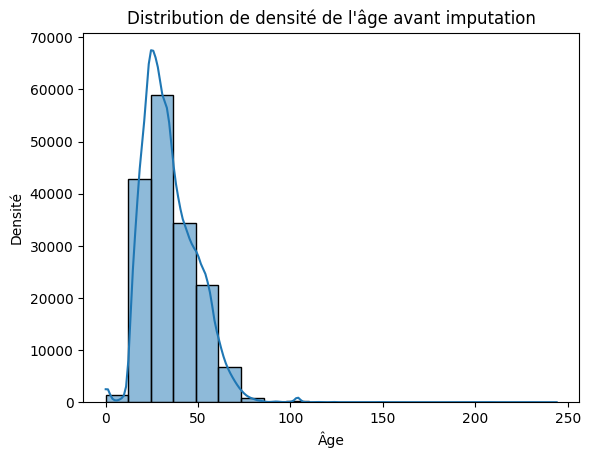

In [39]:
sns.histplot(user.age, bins=20, kde=True)
plt.title("Distribution de densité de l'âge avant imputation")
plt.xlabel("Âge")
plt.ylabel("Densité")

In [40]:
mean=round(user[(user.age>10) & (user.age < 80)]['age'].mean())

In [41]:
user.loc[(user.age<10) | (user.age > 80),'age']=mean
user.age.fillna(mean,inplace=True)

Text(0, 0.5, 'Densité')

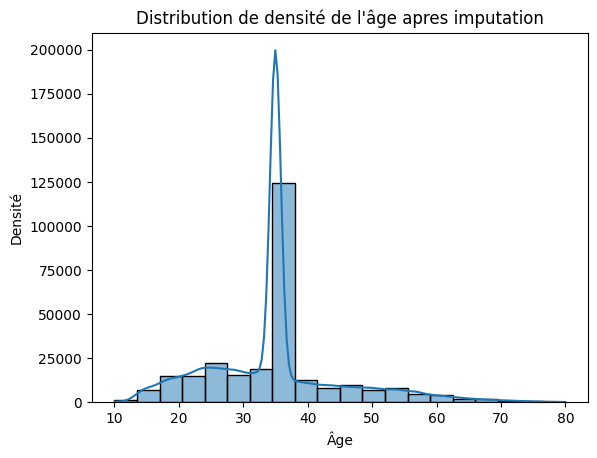

In [42]:
sns.histplot(user.age, bins=20, kde=True)
plt.title("Distribution de densité de l'âge apres imputation")
plt.xlabel("Âge")
plt.ylabel("Densité")

#### 2) Location

In [43]:
user.location

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: location, Length: 278858, dtype: object

In [44]:
user.location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [45]:
user.location.nunique()

57339

In [46]:
user['country']=user.location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$') 

In [47]:
user.head(50)

user_id                                 location   age           country
0         1                       nyc, new york, usa  35.0               usa
1         2                stockton, california, usa  18.0               usa
2         3          moscow, yukon territory, russia  35.0            russia
3         4                porto, v.n.gaia, portugal  17.0          portugal
4         5       farnborough, hants, united kingdom  35.0    united kingdom
5         6            santa monica, california, usa  61.0               usa
6         7                      washington, dc, usa  35.0               usa
7         8                 timmins, ontario, canada  35.0            canada
8         9               germantown, tennessee, usa  35.0               usa
9        10               albacete, wisconsin, spain  26.0             spain
10       11           melbourne, victoria, australia  14.0         australia
11       12              fort bragg, california, usa  35.0               usa
12       13              barcelona, barcelona, spain  26.0             spain
13       14                    mediapolis, iowa, usa  35.0               usa
14       15                 calgary, alberta, canada  35.0            canada
15       16             albuquerque, new mexico, usa  35.0               usa
16       17                chesapeake, virginia, usa  35.0               usa
17       18   rio de janeiro, rio de janeiro, brazil  25.0            brazil
18       19                                weston, ,  14.0                  
19       20             langhorne, pennsylvania, usa  19.0               usa
20       21           ferrol / spain, alabama, spain  46.0             spain
21       22              erfurt, thueringen, germany  35.0           germany
22       23          philadelphia, pennsylvania, usa  35.0               usa
23       24                    cologne, nrw, germany  19.0           germany
24       25                 oakland, california, usa  55.0               usa
25       26                bellevue, washington, usa  35.0               usa
26       27                   chicago, illinois, usa  32.0               usa
27       28    freiburg, baden-wuerttemberg, germany  24.0           germany
28       29              cuernavaca, alabama, mexico  19.0            mexico
29       30                   anchorage, alaska, usa  24.0               usa
30       31                     shanghai, n/a, china  20.0             china
31       32                    portland, oregon, usa  35.0               usa
32       33              costa mesa, california, usa  34.0               usa
33       34          london, england, united kingdom  35.0    united kingdom
34       35                  grafton, wisconsin, usa  17.0               usa
35       36                 montreal, quebec, canada  24.0            canada
36       37                san sebastian, n/a, spain  23.0             spain
37       38                    viterbo, lazio, italy  34.0             italy
38       39                cary, north carolina, usa  35.0               usa
39       40                 tonawanda, new york, usa  32.0               usa
40       41                  santee, california, usa  14.0               usa
41       42                 appleton, wisconsin, usa  17.0               usa
42       43    méxico, méxico city, distrito federal  35.0  distrito federal
43       44      black mountain, north carolina, usa  51.0               usa
44       45                     berlin, n/a, germany  35.0           germany
45       46  heidelberg, baden-wuerttemberg, germany  31.0           germany
46       47                   vicenza, veneto, italy  21.0             italy
47       48                   chicago, illinois, usa  35.0               usa
48       49                        rome, rome, italy  35.0             italy
49       50          london, england, united kingdom  17.0    united kingdom

In [48]:
user.country.nunique()

529

In [49]:
user.isnull().sum()

user_id       0
location      0
age           0
country     368
dtype: int64

In [50]:
user['country']=user['country'].astype('str')

In [51]:
user['country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

#### 2) Location (Second method to handle location)

In [52]:
user.location

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: location, Length: 278858, dtype: object

In [53]:
def valide(string):
    if string == ' ' or string == '' or string=='n/a' or string == ',':  
        return(False)
    return True

In [54]:
list_location=user.location.str.split(", ")

In [55]:
list_location

0                         [nyc, new york, usa]
1                  [stockton, california, usa]
2            [moscow, yukon territory, russia]
3                  [porto, v.n.gaia, portugal]
4         [farnborough, hants, united kingdom]
                          ...                 
278853                 [portland, oregon, usa]
278854    [tacoma, washington, united kingdom]
278855             [brampton, ontario, canada]
278856             [knoxville, tennessee, usa]
278857                  [dublin, n/a, ireland]
Name: location, Length: 278858, dtype: object

In [56]:
#correction des adresses qui contiennent 5 elements et
#les remplacer par une adresse de 3 elements city, state, country
user.loc[5641,'location'] = 'other, other, mexico'
user.loc[6557,'location'] = 'schiltigheim, alsace, france'
user.loc[9695,'location'] = 'other, other, mexico'
user.loc[12512,'location'] = 'nanaimo, british columbia, canada'
user.loc[43946,'location'] = 'vaubuzin, frolois, france'
user.loc[46964,'location'] = "seaview parkway, gulf view, trinidad and tobago"
user.loc[48738,'location'] = "mainz, rhineland palatinate, germany"
user.loc[55159,'location'] = 'newport, Wales, united kingdom'
user.loc[61675,'location'] = 'bracknell, berkshire, united kingdom'
user.loc[65857,'location'] ="geneva, florida, usa"
user.loc[66143,'location'] = "vita, sicilia, italy"
user.loc[66147,'location'] ='ioulís, kea, greece'
user.loc[82756,'location'] = 'mizunami, gifu, japan'
user.loc[83738,'location'] = 'listowel, ontario, canada'
user.loc[85108,'location'] = 'baloira, pontevedra, spain'
user.loc[97080,'location'] = 'bonn, rhine westphalia, germany'
user.loc[98124,'location'] = 'king ct,  green brook, usa'
user.loc[17884,'location'] = 'Mumbai, maharashtra, india'
user.loc[120092,'location'] = 'merrick, new york, united states'
user.loc[120835,'location'] = 'ndianapolis, indiana, united states'
user.loc[131301,'location'] = 'huelva, andalucia, españa'
user.loc[154405,'location'] = 'san rafael arriba, san josé, costa rica'
user.loc[155588,'location'] = 'other, dhaka, bangladesh'
user.loc[155733,'location'] = 'toronto, Ontario, canada'
user.loc[275707,'location'] = 'somers, victoria, australia'
user.loc[274054,'location'] = 'enschede, budapest, hungary'
user.loc[273290,'location'] = 'san ramon, alajuela, costa rica'
user.loc[270111,'location'] = 'bonn, köln, germany'
user.loc[266273,'location'] = 'isabela, basilan, philippines'
user.loc[264917,'location'] = 'zelezny brod, koberovy, czech republic'
user.loc[264458,'location'] = 'coimbra, oliveira do hospital, portugal'
user.loc[263333,'location'] = 'pooc occidental, tubigon, philippines'
user.loc[261650,'location'] = 'méxico, d.f., mexico'
user.loc[258217,'location'] = 'alajuela, san carlos, costa rica'
user.loc[255932,'location'] = 'san josé, san josé, costa rica'
user.loc[255786,'location'] = 'kristianstad, åhus, sweden'
user.loc[249300,'location'] = 'accra, accra, ghana'
user.loc[235579,'location'] = 'quetigny, côte d`or, france'
user.loc[230891,'location'] = 'other, other, france'
user.loc[228791,'location'] = 'mexico, d.f., mexico'
user.loc[225434,'location'] = 'lawrence, kansas, usa'
user.loc[212652,'location'] = 'other, other, usa'
user.loc[203908,'location'] = 'gold coast, queensland, australia'
user.loc[179621,'location'] = 'méxico, d.f., mexico'
user.loc[175617,'location'] = 'south sulawesi, makassar, indonesia'
user.loc[164758,'location'] = 'mexico, d.f., mexico'
user.loc[161512,'location'] = 'ota, ogun state, nigeria'
user.loc[158135,'location'] = 'durbanville, cape town, south africa'
#correction des adresse avec des elements differents de 5 et 3 et les transformer en une adresse avec 3 elements 
user.loc[76342,'location']='tijuana, baja california, mexico'
user.loc[122814,'location']='tubod, lanao del norte, philippines'
user.loc[258822,'location']='northern ireland, lurgan, united kingdom'
user.loc[194259,'location']='daejeon, other, south korea'
user.loc[215970,'location']='silver spring, maryland, usa'
user.loc[241302,'location']='thane, maharastra, india'
user.loc[134376,'location']='lawrenceville, other, usa'

In [57]:
list_location=user.location.str.split(", ")

#### extract latitude and longitude from string address 


In [58]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [59]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")
from itertools import combinations
string='moscow, yukon territory, russia'
def lat_long(string):  
    location=geolocator.geocode(string, timeout=10)
    if location==None:
        List=list(combinations(string.split(","),2))
        for i in range(len(List)):
            List[i]=List[i][0]+List[i][1]
            location=geolocator.geocode(List[i], timeout=10)
            if location!=None:
                break
    if location==None:
        return (pd.Series({'lat':None,'long':None}))
    else:
        return pd.Series({'lat':float(location.raw['lat']),'long':float(location.raw['lon'])})


In [60]:
test=user[:10]
test

user_id                            location   age         country
0        1                  nyc, new york, usa  35.0             usa
1        2           stockton, california, usa  18.0             usa
2        3     moscow, yukon territory, russia  35.0          russia
3        4           porto, v.n.gaia, portugal  17.0        portugal
4        5  farnborough, hants, united kingdom  35.0  united kingdom
5        6       santa monica, california, usa  61.0             usa
6        7                 washington, dc, usa  35.0             usa
7        8            timmins, ontario, canada  35.0          canada
8        9          germantown, tennessee, usa  35.0             usa
9       10          albacete, wisconsin, spain  26.0           spain

In [61]:
from tqdm import tqdm
tqdm.pandas()
test[['lat','long']]=(0,0)
test[['lat','long']]=test.location.progress_apply(lat_long)

100%|██████████████████████████████████████████| 10/10 [00:09<00:00,  1.08it/s]


In [62]:
test

user_id                            location   age         country  \
0        1                  nyc, new york, usa  35.0             usa   
1        2           stockton, california, usa  18.0             usa   
2        3     moscow, yukon territory, russia  35.0          russia   
3        4           porto, v.n.gaia, portugal  17.0        portugal   
4        5  farnborough, hants, united kingdom  35.0  united kingdom   
5        6       santa monica, california, usa  61.0             usa   
6        7                 washington, dc, usa  35.0             usa   
7        8            timmins, ontario, canada  35.0          canada   
8        9          germantown, tennessee, usa  35.0             usa   
9       10          albacete, wisconsin, spain  26.0           spain   

         lat        long  
0  40.712728  -74.006015  
1  37.957702 -121.290780  
2  55.750446   37.617494  
3  41.149451   -8.610788  
4  51.291869   -0.753984  
5  34.019470 -118.491227  
6  38.895037  -77.036543  
7  48.477473  -81.330414  
8  35.086758  -89.810086  
9  38.995092   -1.855915

##### This method cost a lot of time so we have to leave it..

In [64]:
#drop location column
user.drop('location',axis=1,inplace=True)

### 3) Table Ratings :

In [65]:
print(rating.columns)
rating.rename(columns={"User-ID":"id","Book-Rating":"rating"},inplace=True)
print('\nRename to --->\n', rating.columns)

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

Rename to --->
 Index(['id', 'ISBN', 'rating'], dtype='object')


On remplace les 'X' par 'x' dans l'ISBN..

In [66]:
rating['ISBN']=rating['ISBN'].str.replace("X","x")

In [67]:
rating.head()

id        ISBN  rating
0  276725  034545104x       0
1  276726  0155061224       5
2  276727  0446520802       0
3  276729  052165615x       3
4  276729  0521795028       6

<BarContainer object of 6 artists>

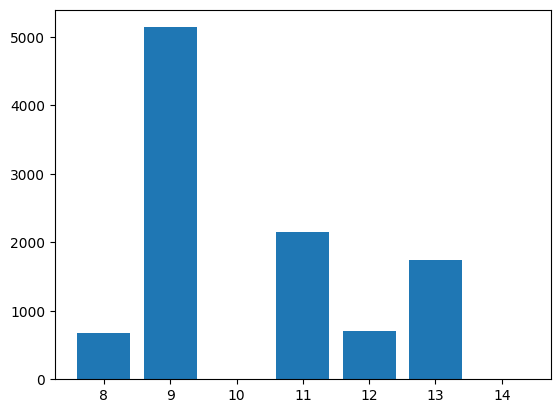

In [68]:
# value counts  de longueur de ISBN
long=rating.ISBN.apply(len).value_counts()
x=list(long.to_frame().index)
y=long.to_frame().values
y=list(y.reshape(-1))
if 10 in x :
    y.pop(x.index(10))
    x.pop(x.index(10))
plt.bar(x,y)

### ISBN with 9 elements 

In [69]:
list_to_drop=[]
#apres verification sur google les ISBN avec 9 elements et qui ne contiennet pas x a la fin ne corresponds pas a des livre 
for i in range(len(rating)):
    if len(rating.iloc[i,1])==9:
        if rating.iloc[i,1].isnumeric()==False and rating.iloc[i,1][-1]!='x':
            list_to_drop.append(i)

In [70]:
#ISBN
for i in range(len(rating)):
    if len(rating.iloc[i,1])==9:
        if rating.iloc[i,1].isnumeric()==False and rating.iloc[i,1][-1]=='x':
            if len(book[book['ISBN']=='0'+rating.iloc[i,1]])!=0: # il y a correspondance 
                rating.iloc[i,1]='0'+rating.iloc[i,1]
            else:
                list_to_drop.append(i)

In [71]:
for i in range(len(rating)):
    if len(rating.iloc[i,1])==9:
        if rating.iloc[i,1].isnumeric()==True :
            if len(book[(book['ISBN']=='0'+rating.iloc[i,1]) | (book['ISBN']==rating.iloc[i,1]+'x')])!=0:
                if len(book[book['ISBN']=='0'+rating.iloc[i,1]])!=0:
                    rating.iloc[i,1]='0'+rating.iloc[i,1]
                if len(book[book['ISBN']==rating.iloc[i,1]+'x'])!=0:
                    rating.iloc[i,1]=rating.iloc[i,1]+'x'
            else:
                list_to_drop.append(i)

In [72]:
rating=rating.drop(index=list_to_drop)

#### Check for any duplicate after preprocessing the ISBN

In [73]:
nun = rating.groupby(['ISBN','id']).agg(['count','nunique'])
nun.loc[nun[('rating','count')] == 2]

rating        
                   count nunique
ISBN       id                   
0060177209 194027      2       1
006101351x 11676       2       2
0064400085 127429      2       1
0140440151 273718      2       1
034541389x 76767       2       2
0373244487 89098       2       2
038549081x 83596       2       1
0385504209 11676       2       2
039470388x 117539      2       1
0399501487 52584       2       1
0425031748 102967      2       1
044021145x 202277      2       1
0446611778 11676       2       2
0452261368 245827      2       2
051512608x 26407       2       1
051513287x 190925      2       1
051513306x 180549      2       1
051513628x 11676       2       2
055335387x 11676       2       2
055358099x 183145      2       2
059045661x 198711      2       1
0671028375 177861      2       2
067976402x 127914      2       1
0843947624 26535       2       1
086625370x 245827      2       1
086625501x 245827      2       1
088396631x 143175      2       1
           166596      2       1
           277879      2       2
325723158x 125224      2       2
342660700x 11676       2       2
842046435x 11676       2       2
881787017x 83879       2       2

In [74]:
# Remove duplicates
rating = rating.drop_duplicates(subset=['id', 'ISBN'])

In [75]:
rating['ISBN'].apply(len)

0          10
1          10
2          10
3          10
4          10
           ..
1149775    10
1149776    10
1149777    10
1149778    10
1149779    11
Name: ISBN, Length: 1145621, dtype: int64

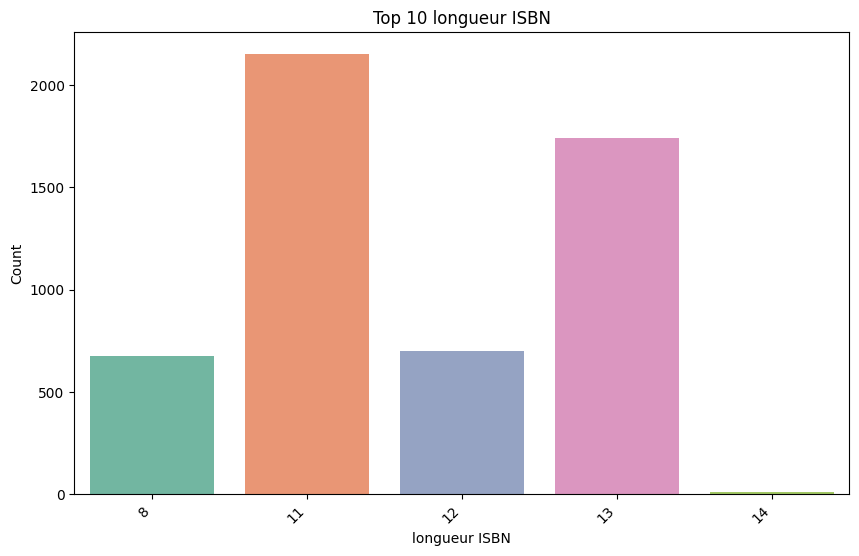

In [76]:
long=pd.DataFrame(rating['ISBN'].apply(len).reset_index())
long.rename(columns={'ISBN':'longueur ISBN'},inplace=True)
plot_count(long[long['longueur ISBN']!=10],"longueur ISBN")

### Split rating in rating explicit and implicit

In [77]:
#Hence segragating implicit and explict ratings datasets
rating_explicit = rating[rating['rating'] != 0]

In [78]:
rating['rating_implicit'] = rating['rating'].apply(lambda x: 0 if (x <6) else 1)

In [79]:
rating.rating_implicit.value_counts()

0    783784
1    361837
Name: rating_implicit, dtype: int64

In [81]:
rating.to_pickle('pickle/rating.pkl')
rating_explicit.to_pickle('pickle/rating_explicit.pkl')

In [82]:
rating_explicit.shape

(431903, 3)

From now, we are going to work with explicit ratings

In [83]:
rating = pd.read_pickle('pickle/rating_explicit.pkl')

### Data Preprocessing attended

- Delete users who give the same rating to all the books they have reviewed
- Delete users who have rated less than 8 books.
- Delete books that are rated by less than 8 users.

In [84]:
removed_ratings = 0
while True:

    ### Delete users who give the same rating to all the books they have reviewed:

    # We don't remove users that give only one rating_explicit.

    # Group the data frame by id and count the number of unique ratings
    rating_counts = rating.groupby('id')['rating'].agg(['count', 'nunique'])

    # Filter the data frame to only include users who have given the same rating to all books
    same_rating_users = rating_counts[(rating_counts['nunique'] == 1) & (rating_counts['count'] > 1)]

    # Select the rows from the original DataFrame that correspond to these users
    to_remove_1 = rating[rating['id'].isin(same_rating_users.index)]

    ### Delete users who have rated less than 8 books:

    # Group the DataFrame by user ID and count the number of books rated by each user
    user_counts = rating.groupby('id')['ISBN'].count()

    # Filter the DataFrame to select only users who have rated less than 8 books
    less_than_8_books = user_counts[user_counts < 8]

    # Select the rows from the original DataFrame that correspond to these users
    to_remove_2 = rating[rating['id'].isin(less_than_8_books.index)]

    ### Delete books that are rated by less than 8 users.

    # Group the DataFrame by ISBN and count the number of users who rated each book
    book_counts = rating.groupby('ISBN')['id'].count()

    # Filter the DataFrame to select only books that are rated by less than 8 users
    less_than_8_users = book_counts[book_counts < 8]

    # Select the rows from the original DataFrame that correspond to these books
    to_remove_3 = rating[rating['ISBN'].isin(less_than_8_users.index)]

    ### Remove dataframes to_remove_1,2,3
    merged_df = pd.concat([to_remove_1, to_remove_2], axis=0)
    merged_df = pd.concat([merged_df, to_remove_3], axis=0)
    rating_cleaned = pd.concat([rating, merged_df, merged_df]).drop_duplicates(keep=False)

    if len(rating) == len(rating_cleaned):
        break
    else:
        removed_ratings += len(rating) - len(rating_cleaned)
        rating = rating_cleaned

print('Number of rows deleted: ', removed_ratings)

Number of rows deleted:  369495


## Display book recommentation : 

In [85]:
import urllib.request
from PIL import Image
from io import BytesIO

url = "https://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg"
def plot_image(url):    
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    req = urllib.request.Request(url, headers=headers)

    try:
        response = urllib.request.urlopen(req)
        if response.status == 200:
            img_data = response.read()
            img = Image.open(BytesIO(img_data))
        elif response.status == 304:
            print("Image not modified")
        else:
            print(f"Unexpected status code: {response.status}")
    except urllib.error.HTTPError as e:
        print(f"HTTP error: {e.code}")
    except urllib.error.URLError as e:
        print(f"URL error: {e.reason}")
    return(img)

In [86]:
search_isbn("0345413873")

{'ISBN': '0345413873',
 'title': 'Monster',
 'author': 'Jonathan Kellerman',
 'publisher': 'Random House Digital, Inc.',
 'date': 2000,
 'nombre de pages': 420,
 'description': "Dr. Alex Delaware and Detective Milo Sturgis must make sense of a nonfunctional psychotic's ramblings that seem to predict the horrific killings happening on the streets of Los Angeles.",
 'image_links': 'http://images.amazon.com/images/P/0345413873.01.LZZZZZZZ.jpg'}

In [87]:
import requests
from PIL import Image
def display_popular_books(model,df=rating_explicit, n=5):
    recommendation=[]
    try:#### AJOUT
      recommended=model()
    except TypeError: #### AJOUT
      recommended = model #### AJOUT
    for i in range(len(recommended)):
        d=search_isbn(recommended.loc[i,"ISBN"])
        d['Score']=recommended.loc[i,"Score"]
        recommendation.append(d)
    recommendation=pd.DataFrame(recommendation)
    display(recommendation)    
    fig, ax = plt.subplots(1, n, figsize=(17, 5))
    fig.suptitle("MOST POPULAR {} BOOKS".format(n), fontsize=40, color=palette[0])
    for i in range(len(recommendation)):
        url = recommendation["image_links"][i]
        img = plot_image(url)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {} ".format(round(recommendation.loc[i,'Score'],4)),y=-0.20,color=palette[1],fontsize=10)
    plt.show()

# 4) Modeling

## 1) simple recommendation system 

The popularity-based recommendation system uses current trends to suggest items. For example, if there is a book that is typically purchased by every new user, it is likely that this book will be recommended to the user who just signed up.

The formula for weighting books is as follows:

$$Weighted Rating(WR)=\frac{vR}{(v+m)} + \frac{mC}{(v+m)}$$


where,
v is the number of votes for the book ;
m is the minimum number of votes required to appear in the ranking;
R is the average score for the book; and
C is the average vote for the entire report.

Thus, we find the values of v, m, R and C.

In [89]:
rating_explicit = rating
# Create column Rating average 
rating_explicit['Avg_Rating']=rating_explicit.groupby('ISBN')['rating'].transform('mean')
# Create column Rating sum
rating_explicit['nbr_ratings_per_book']=rating_explicit.groupby('ISBN')['rating'].transform('count')

In [90]:
C= rating_explicit['Avg_Rating'].mean()
m= rating_explicit['nbr_ratings_per_book'].quantile(0.90)

In [91]:
def weighted_rating(x, m=m, C=C):
    v = x['nbr_ratings_per_book']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [92]:
def mean(x):
    R = x['Avg_Rating']
    return (R)

In [93]:
#hyperparametres
nbr_recommendation=5
estimateur=weighted_rating

In [94]:
rating_explicit.head()

id        ISBN  rating  Avg_Rating  nbr_ratings_per_book
911  277157  0312979517       5    7.000000                    10
913  277157  0316154059       5    7.785714                    14
917  277157  0345452550       7    7.764706                    17
928  277157  0399146504       7    7.500000                     8
936  277157  0399148639       6    7.944444                    18

Nous avons utilisé le 90ème percentile comme critère de sélection. Cela signifie qu'un livre doit avoir plus de votes que 90% des livres de la liste pour figurer dans le classement. Il y a 38 570 livres qui répondent à ce critère et nous allons calculer notre métrique pour chacun d'eux en définissant une fonction "weighted_rating()" et en calculant une nouvelle fonction "score".

In [95]:
#based on popularity
def simple_recommendation_system(nbr_recommendation=nbr_recommendation,ratings=rating_explicit,estimateur=weighted_rating,m=m):
    book_frequent = ratings.loc[ratings['nbr_ratings_per_book'] >= m]
    book_frequent.loc[:,'Score'] = book_frequent.apply(estimateur,axis=1)
    book_frequent = book_frequent.sort_values('Score', ascending=False).drop_duplicates('ISBN').iloc[:nbr_recommendation,:][['ISBN','Score']]
    return(book_frequent.reset_index(drop=True))

ISBN                                      title         author  \
0  0439139597                               Harry Potter  J. K. Rowling   
1  0439136350                               Harry Potter  J. K. Rowling   
2  043935806x  Harry Potter and the Order of the Phoenix  J. K. Rowling   
3  059035342x      Harry Potter and the Sorcerer's Stone  J. K. Rowling   
4  0446310786                      To Kill a Mockingbird     Harper Lee   

                  publisher  date  nombre de pages  \
0                Scholastic  2009              NaN   
1                Scholastic  1999            435.0   
2                Scholastic  2003           1232.0   
3    Arthur A. Levine Books  1998            324.0   
4  Grand Central Publishing  1988            384.0   

                                         description  \
0  Collects the complete series that relates the ...   
1  During his third year at Hogwarts School for w...   
2  Collects the complete series that relates the ...   
3  Rescued from the outrageous neglect of his aun...   
4  The unforgettable novel of a childhood in a sl...   

                                         image_links     Score  
0  http://images.amazon.com/images/P/0439139597.0...  8.666633  
1  http://images.amazon.com/images/P/0439136350.0...  8.646057  
2  http://images.amazon.com/images/P/043935806X.0...  8.629424  
3  http://images.amazon.com/images/P/059035342X.0...  8.618802  
4  http://images.amazon.com/images/P/0446310786.0...  8.601420

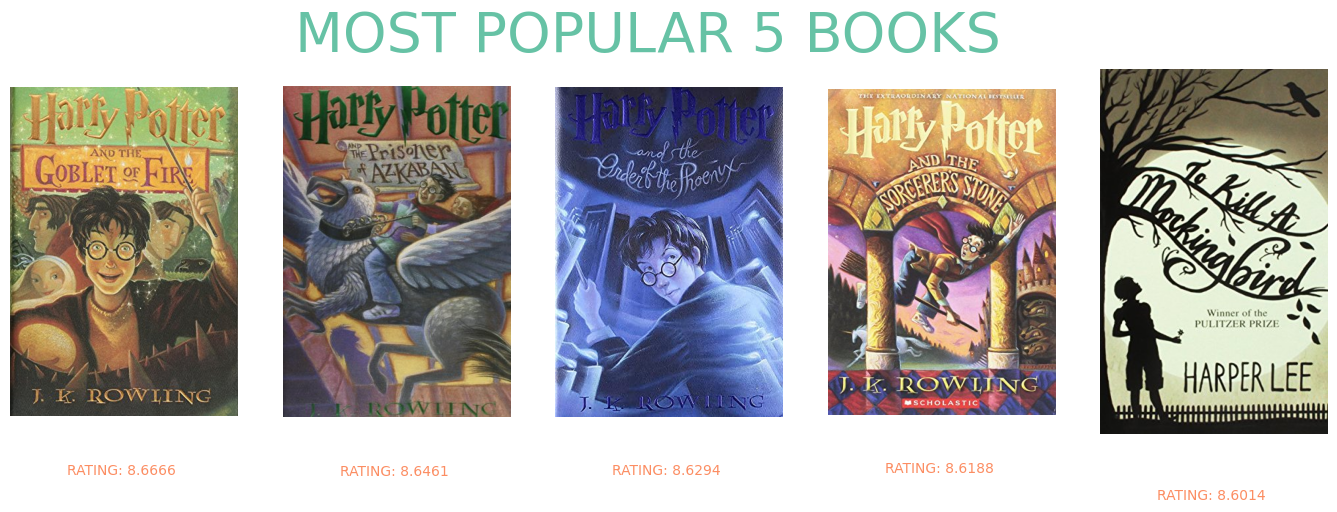

In [96]:
display_popular_books(simple_recommendation_system)

Ce système de recommendation peut être utilisé pour un nouvel utilisateur

# Collaborative Filtering Based Recommendation Systems



In [97]:
user_item = rating_explicit.pivot(index='id', columns='ISBN', values='rating')

In [98]:
user_item.fillna(0, inplace = True)
user_item = user_item.astype(np.int32)

In [99]:
#checking first few rows
user_item.head(5)

ISBN  000649840x  0007154615  0020198906  0020199600  0020427859  0020442009  \
id                                                                             
243            0           0           0           0           0           0   
254            0           0           0           0           0           0   
507            0           0           0           0           9           0   
638            0           0           0           0           0           0   
805            0           0           0           0           0           0   

ISBN  0020442203  0020442300  0020442602  002542730x  ...  1857989546  \
id                                                    ...               
243            0           0           0           0  ...           0   
254            0           0           0           0  ...           0   
507            0           0           0           0  ...           0   
638            0           0           0           0  ...           0   
805            0           0           0           0  ...           0   

ISBN  1861976127  1878424114  1878424319  1880418568  1881273156  1885171080  \
id                                                                             
243            0           0           0           0           0           0   
254            0           0           0           0           0           0   
507            0           0           0           0           0           0   
638            0           0           0           0           0           0   
805            0           0           0           0           0           0   

ISBN  1896860982  193156146x  1931561648  
id                                        
243            0           0           0  
254            0           0           0  
507            0           0           0  
638            0           0           0  
805            0           0           0  

[5 rows x 3488 columns]

In [100]:
n_users = user_item.shape[0] #considering only those users who gave explicit ratings
n_books = user_item.shape[1]

In [101]:
#rechecking the sparsity
sparsity=1.0-len(user_item)/float(user_item.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.97133027522935 %


In [102]:
global metric,k
k=10
metric='cosine'

In [103]:
rating_explicit

id        ISBN  rating  Avg_Rating  nbr_ratings_per_book
911      277157  0312979517       5    7.000000                    10
913      277157  0316154059       5    7.785714                    14
917      277157  0345452550       7    7.764706                    17
928      277157  0399146504       7    7.500000                     8
936      277157  0399148639       6    7.944444                    18
...         ...         ...     ...         ...                   ...
1149714  276688  0553575090       7    8.125000                     8
1149715  276688  0553575104       6    6.500000                    10
1149738  276688  0688156134       8    7.200000                    10
1149743  276688  0836218655      10    8.153846                    13
1149744  276688  0836236688      10    8.166667                    12

[62408 rows x 5 columns]

## 1) User-based Recommendation System

User-based recommendation systems are a type of collaborative filtering method used to generate recommendations for users based on the preferences of similar users. The main idea behind user-based recommendation systems is to identify users who have similar preferences to a target user and recommend items that these similar users have liked.

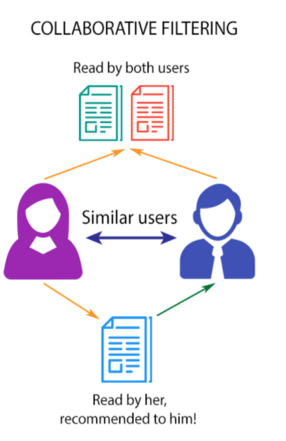

More preprocessing if needed..

In [104]:
# on consieded rate > 100
#user >100
# print(rating_explicit.shape[0])
# count1=rating_explicit.id.value_counts()
# rating_explicit=rating_explicit[rating_explicit.id.isin(count1[count1>40].index)]
# count2=rating_explicit.ISBN.value_counts()

# rating_explicit=rating_explicit[rating_explicit.ISBN.isin(count2[count2>10].index)]
# rating_explicit

In [105]:
user_item = rating_explicit.pivot(index='id', columns='ISBN', values='rating')
user_item.fillna(0, inplace = True)
user_item = user_item.astype(np.int32)

In [106]:
from sklearn.neighbors import NearestNeighbors
def findksimilarusers(user_id, ratings, metric = 'cosine', k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    return similarities,indices

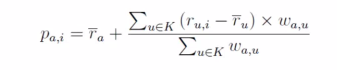

In [107]:
def predict_userbased(user_id, item_id, ratings, metric='cosine', k=1):
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices = findksimilarusers(user_id, ratings, metric, k)
    
    # Calculate the mean rating for the target user
    mean_rating = ratings.iloc[user_loc,:].mean()
    
    # Calculate the weighted sum of similarities and ratings for the target item
    weighted_sum = 0
    if len(indices[0]) > 0:
        for i in range(len(indices[0])):
            if indices[0][i] != user_loc:
                # Check if the i-th similar user rated the item
                if not np.isnan(ratings.iloc[indices[0][i], item_loc]):
                    similarity = similarities[i]
                    rating = ratings.iloc[indices[0][i], item_loc]
                    weighted_sum += similarity * rating
                
    # Calculate the predicted rating as the mean rating plus the weighted sum
    prediction = mean_rating + (weighted_sum / (np.sum(similarities)-1)) 
    
    return(prediction)


In [108]:
predict=predict_userbased(274301,"0553280368",user_item)
predict

9.16227064220183

In [109]:
true=user_item.loc[274301,"0553280368"]

In [110]:
print("true value",true,"|| prediction",predict)

true value 10 || prediction 9.16227064220183


In [111]:
def recommendItem(user_id, rating, metric=metric):    
    if (user_id not in rating.index.values):
        print ("user id must be in: ",rating.index.values)
    else:    
        L = {}            
        for i in range(rating.shape[1]):
            if (rating[rating.columns[i]][user_id] !=0): #not rated already
                p = predict_userbased(user_id, rating.columns[i] ,rating, metric)
                L.add(p)
                if p==None:
                    L.add(-1)
                else:
                    L.append(p) #for not enough similar users
            else:                    
                L.append(-1) #for already rated items 
        L = (sorted(L).reverse())
        return(L)

In [112]:
def prediction(nbr_recommendation=nbr_recommendation,ratings=rating_explicit):
    user_id=int(input("user_id : "))
    if (user_id not in user_item.index.values):
            print ("user id must be in: ",user_item.index.values)
    else:
        L=[]
        for i in range(user_item.shape[1]):
            if (user_item[user_item.columns[i]][user_id] !=0): #not rated already
                p = predict_userbased(user_id, user_item.columns[i] ,user_item, metric)
                L.append((user_item.columns[i],p))
        L=pd.DataFrame(L).sort_values(by=[1],ascending=False)
        L.rename(columns={0:"ISBN",1:"Score"},inplace=True)
        L=L.reset_index(drop=True)
    return(L[:nbr_recommendation])

user_id : 193458


ISBN                                        title       author  \
0  0064471047  The Lion, the Witch and the Wardrobe (rack)  C. S. Lewis   
1  0064471063                 The Horse and His Boy (rack)  C. S. Lewis   
2  0064471071        The Voyage of the Dawn Treader (rack)  C. S. Lewis   
3  006447108x                       The Last Battle (rack)  C. S. Lewis   
4  0064471098                      The Silver Chair (rack)  C. S. Lewis   

       publisher  date  nombre de pages  \
0  HarperCollins  1994              228   
1  HarperCollins  1994              256   
2  HarperCollins  1994              292   
3  HarperCollins  1994              240   
4  HarperCollins  1994              272   

                                         description  \
0  They open a door and enter a world Narnia ... ...   
1  An orphaned boy and a kidnapped horse gallop f...   
2  A voyage to the very ends of the world Narnia ...   
3  The last battle is the greatest of all battles...   
4  Narnia ... where giants wreak havoc ... where ...   

                                         image_links     Score  
0  http://images.amazon.com/images/P/0064471047.0...  10.08945  
1  http://images.amazon.com/images/P/0064471063.0...  10.08945  
2  http://images.amazon.com/images/P/0064471071.0...  10.08945  
3  http://images.amazon.com/images/P/006447108X.0...  10.08945  
4  http://images.amazon.com/images/P/0064471098.0...  10.08945

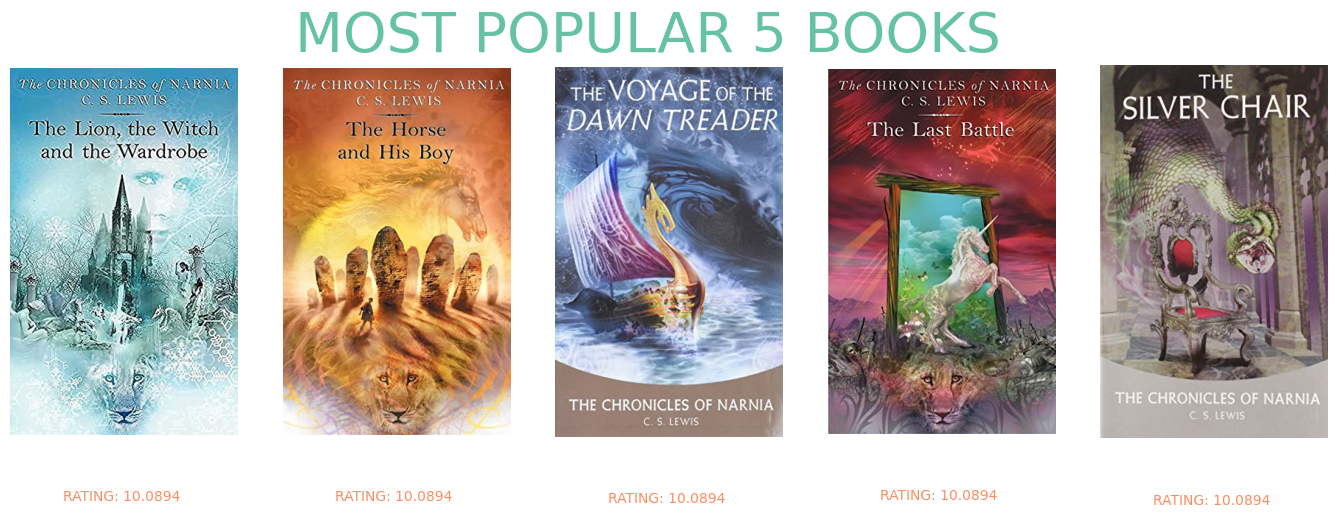

In [113]:
display_popular_books(prediction)

## 2) Item-based Recommendation System


Item-based recommendation systems are a type of collaborative filtering method used to generate recommendations for users based on their past interactions with items. The main idea behind item-based recommendation systems is to identify items that are similar to each other based on the users who have interacted with them and use this similarity to make recommendations.

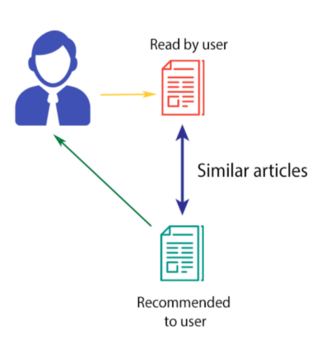

In [114]:
def findksimilaritems( ratings=user_item, metric = metric, k=5):
    item_id=input(" item_id ")
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    distances=distances[0]
    indices=indices[0]
    similarity=1-distances
    L=pd.DataFrame({"ISBN":indices,"Score":similarity})
    L.ISBN=L.ISBN.apply(lambda x : user_item.columns[x])
    return L[1:].reset_index(drop=True)

 item_id 0439139597


ISBN                                      title         author  \
0  0439136350                               Harry Potter  J. K. Rowling   
1  0439064864    Harry Potter and the Chamber of Secrets  J. K. Rowling   
2  0590353403      Harry Potter and the Sorcerer's Stone  J. K. Rowling   
3  043935806x  Harry Potter and the Order of the Phoenix  J. K. Rowling   
4  059035342x      Harry Potter and the Sorcerer's Stone  J. K. Rowling   

                publisher  date  nombre de pages  \
0              Scholastic  1999              435   
1              Scholastic  1999              364   
2  Arthur A. Levine Books  1998              328   
3              Scholastic  2003             1232   
4  Arthur A. Levine Books  1998              324   

                                         description  \
0  During his third year at Hogwarts School for w...   
1  After 10 miserable years with his aunt and unc...   
2  Rescued from the outrageous neglect of his aun...   
3  Collects the complete series that relates the ...   
4  Rescued from the outrageous neglect of his aun...   

                                         image_links     Score  
0  http://images.amazon.com/images/P/0439136350.0...  0.640892  
1  http://images.amazon.com/images/P/0439064864.0...  0.618877  
2  http://images.amazon.com/images/P/0590353403.0...  0.462307  
3  http://images.amazon.com/images/P/043935806X.0...  0.444506  
4  http://images.amazon.com/images/P/059035342X.0...  0.228176

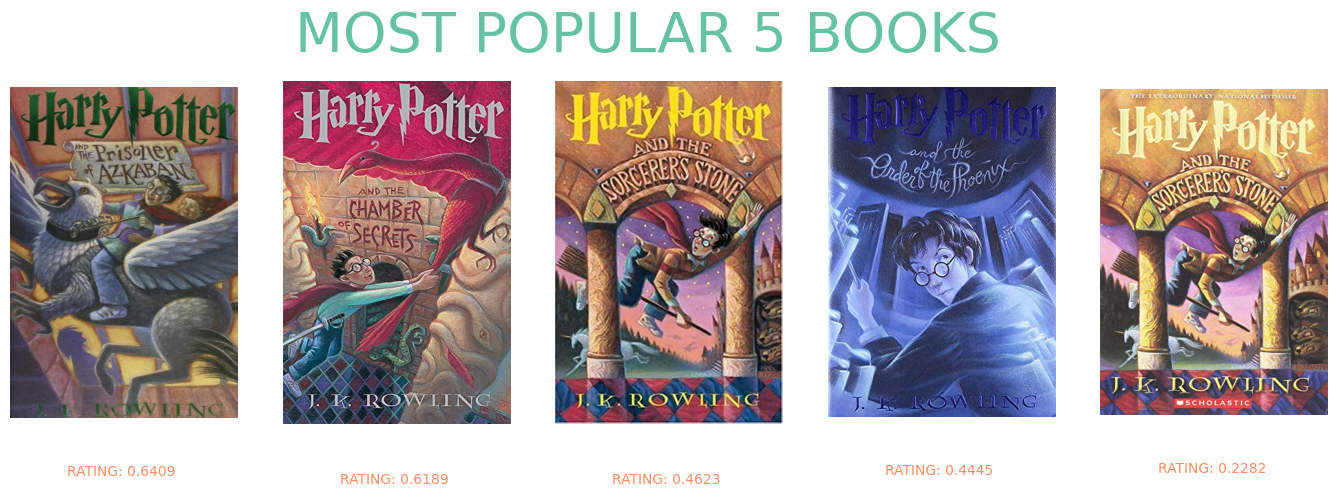

In [115]:
display_popular_books(findksimilaritems) # Harry Potter 2009 ISBN: 0439139597

## 3) Model based

We're going to use Surprise which is a Python library that provides a set of algorithms for building and evaluating recommendation systems. It includes several matrix factorization methods, including NMF, as well as other techniques such as Singular Value Decomposition (SVD) and Alternating Least Squares (ALS).

#### 1) SVD : Singular value decomposition

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix into three smaller matrices. The goal of SVD is to find the low-rank approximation of a given matrix. The low-rank approximation is a matrix with a lower number of dimensions than the original matrix, but it still captures the essential features of the data.

In the context of recommendation systems, SVD can be used to factorize a user-item matrix into two low-rank matrices representing user preferences and item attributes, respectively. SVD is a popular method for recommendation systems because it is simple, efficient, and provides good results in practice.

In [116]:
user_ratings_threshold = 8

filter_users = rating_explicit['id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = rating_explicit[rating_explicit['id'].isin(filter_users_list)]

In [117]:
df_ratings_top = df_ratings_top.drop_duplicates(subset=['id', 'ISBN'])
user_item = df_ratings_top.pivot(index='id', columns='ISBN', values='rating')
user_item.fillna(0, inplace=True)
user_item = user_item.astype(np.int32)


In [118]:
!pip install scikit-surprise
# conda install -c conda-forge scikit-surprise # if conda

In [119]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [120]:
def model_based_recom_svd(rating_explicit):

  # Chargement des données
  df = rating_explicit.copy()
  reader = Reader(rating_scale=(1, 10))
  data = Dataset.load_from_df(df[['id', 'ISBN', 'rating']], reader)

  # Définition de la grille de paramètres à tester
  param_grid = {'n_factors': [50, 100, 150],'n_epochs': [20, 30],'lr_all': [0.002, 0.005],'reg_all': [0.02, 0.04, 0.06]}

  # Recherche de grilles pour trouver les meilleurs hyperparamètres
  gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
  gs.fit(data)


  trainset, testset = train_test_split(data, test_size=0.2)
  # Entraînement du modèle avec les meilleurs hyperparamètres trouvés
  best_model = SVD(n_factors=gs.best_params['rmse']['n_factors'],
                   n_epochs=gs.best_params['rmse']['n_epochs'],
                   lr_all=gs.best_params['rmse']['lr_all'],
                   reg_all=gs.best_params['rmse']['reg_all'])

  # Evaluation du modèle avec une validation croisée
  cross_validate(best_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
  predictions = best_model.test(testset)
  df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
  df_pred = df_pred.assign(abs_err=abs(df_pred['pred_rating'] - df_pred['actual_rating'])).drop('details', axis=1)
  return df_pred


In [121]:
df_pred = model_based_recom_svd(rating_explicit)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5211  1.5033  1.5096  1.5131  1.5502  1.5195  0.0164  
MAE (testset)     1.1619  1.1489  1.1574  1.1529  1.1817  1.1605  0.0115  
Fit time          0.90    0.91    0.91    1.50    1.65    1.17    0.33    
Test time         0.13    0.15    0.25    0.27    0.40    0.24    0.10    


In [122]:
def model_based_recom_test(df_pred, user_id, ratings):
    df_book = book.copy()
    df_rating = rating.copy()
    # rename column name 'ISBN' to 'isbn' in the book dataframe
    df_book = df_book.rename(columns={'ISBN': 'isbn'})
    df_rating = df_rating.rename(columns={'ISBN': 'isbn'})
    df_pred.rename(columns={'user_id': 'id', 'pred_rating': 'Score'}, inplace=True)
    # merge the book dataframe with the rating dataframe on 'isbn' column
    df_merged = pd.merge(df_rating, df_book[['isbn', 'title']], on='isbn', how='left')

    # merge the df_pred dataframe with the merged dataframe on 'isbn' and 'user_id' columns
    df_ext = pd.merge(df_pred[['isbn', 'id', 'Score']], df_merged, on=['isbn', 'id'], how='left')

    # filter the dataframe to only include rows with the specified user_id and predicted ratings
    df_user = df_ext[(df_ext['id'] == user_id) & (df_ext['Score'].notna())]

    # filter the dataframe to only include books with actual ratings of 9 or 10
    top_rated_books = df_merged[(df_merged['id'] == user_id) & (df_merged['rating'] >= 9)]

    # sort the dataframe by predicted rating in descending order and select the top 5 books
    top_pred_books = df_user.sort_values('Score', ascending=False)

    # concatenate the two dataframes and select only the 'isbn' and 'rating' columns
    recommended_books = pd.concat([top_pred_books, top_rated_books])[['isbn','Score']]
   
    return recommended_books.sort_values('Score', ascending=False)[:nbr_recommendation][['isbn', 'Score']].reset_index(drop=True).rename(columns={'isbn': 'ISBN'})

In [123]:
model_based_recom_test(df_pred=df_pred, user_id=193458, ratings=rating_explicit)

ISBN     Score
0  1853260002  9.159259
1  0064471098  8.348336
2  0451169530  8.279146
3  0399145923  8.133062
4  0140298479  8.083134

ISBN                              title          author  \
0  1853260002                Pride and Prejudice     Jane Austen   
1  0064471098            The Silver Chair (rack)     C. S. Lewis   
2  0451169530                          The Stand    Stephen King   
3  0399145923                      Carolina Moon    Nora Roberts   
4  0140298479  Bridget Jones: The Edge of Reason  Helen Fielding   

                   publisher  date  nombre de pages  \
0        Wordsworth Editions  1992              292   
1              HarperCollins  1994              272   
2                Signet Book  1991             1172   
3               Putnam Adult  2000              456   
4  National Geographic Books  2001                0   

                                         description  \
0  Elizabeth Bennet's early determination to disl...   
1  Narnia ... where giants wreak havoc ... where ...   
2  Horrific disaster as a plague virus sweeps the...   
3  Illustrated poems written in the sytle of Edwa...   
4  With another devastatingly hilarious, ridiculo...   

                                         image_links     Score  
0  http://images.amazon.com/images/P/1853260002.0...  9.159259  
1  http://images.amazon.com/images/P/0064471098.0...  8.348336  
2  http://images.amazon.com/images/P/0451169530.0...  8.279146  
3  http://images.amazon.com/images/P/0399145923.0...  8.133062  
4  http://images.amazon.com/images/P/0140298479.0...  8.083134

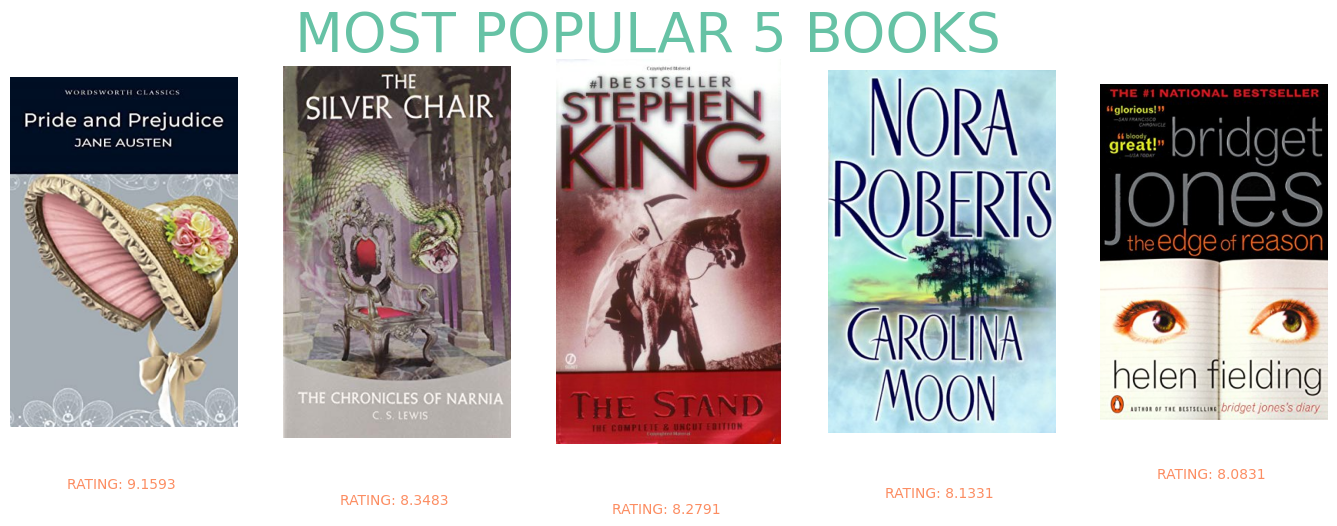

In [124]:
display_popular_books(model_based_recom_test(df_pred=df_pred, user_id=193458, ratings=rating_explicit))

#### 2) NMF : Non-Negative Matrix Factorization

Non-negative matrix factorization (NMF) is a matrix decomposition technique that can be used for various purposes, such as feature extraction, data compression, and recommendation systems. In the context of recommendation systems, NMF can be used to factorize a user-item matrix into two low-rank matrices representing user preferences and item attributes, respectively.

In [135]:
def model_based_recom_nmf(rating_explicit):
    df = rating_explicit.copy()
    reader = Reader(rating_scale=(1, 10))
    data = Dataset.load_from_df(df[['id', 'ISBN', 'rating']], reader)

  # Définition de la grille de paramètres à tester
    param_grid = {'n_factors': [50, 100],
              'n_epochs': [20],
              'lr_bu': [0.002, 0.005],
              'lr_bi': [0.002, 0.005],
              'reg_bu': [0.02, 0.06],
              'reg_bi': [0.02, 0.06],
              'reg_pu': [0.02, 0.06],
              'reg_qi': [0.02, 0.06]}

  # Recherche de grilles pour trouver les meilleurs hyperparamètres
    gs = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=3)
    gs.fit(data)

  # Entraînement du modèle avec les meilleurs hyperparamètres trouvés
    best_model = NMF(n_factors=gs.best_params['rmse']['n_factors'],
                   n_epochs=gs.best_params['rmse']['n_epochs'],
                   lr_bu=gs.best_params['rmse']['lr_bu'],
                   lr_bi=gs.best_params['rmse']['lr_bi'],
                   reg_bu=gs.best_params['rmse']['reg_bu'],
                   reg_bi=gs.best_params['rmse']['reg_bi'],
                   reg_pu=gs.best_params['rmse']['reg_pu'],
                   reg_qi=gs.best_params['rmse']['reg_qi'])

  # Evaluation du modèle avec une validation croisée
    cross_validate(best_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    trainset, testset = train_test_split(data, test_size=0.2)
    best_model.fit(trainset)
    predictions = best_model.test(testset)
    df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
    df_pred = df_pred.assign(abs_err=abs(df_pred['pred_rating'] - df_pred['actual_rating'])).drop('details', axis=1)
    return df_pred

In [136]:
df_pred_nmf = model_based_recom_nmf(rating_explicit)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.3927  2.3679  2.3548  2.3914  2.3620  2.3738  0.0155  
MAE (testset)     1.8263  1.8001  1.7840  1.8191  1.7955  1.8050  0.0155  
Fit time          3.07    1.75    1.82    1.60    1.46    1.94    0.58    
Test time         0.23    0.13    0.14    0.12    0.12    0.15    0.04    


In [137]:
model_based_recom_test(df_pred=df_pred_nmf, user_id=193458, ratings=rating_explicit)

ISBN  Score
0  0449006522   10.0
1  0345361792   10.0
2  006447108x   10.0
3  0142001740   10.0
4  0671880314   10.0

ISBN                    title           author  \
0  0449006522  The Manhattan Hunt Club        John Saul   
1  0345361792  A Prayer for Owen Meany      John Irving   
2  006447108x   The Last Battle (rack)      C. S. Lewis   
3  0142001740  The Secret Life of Bees    Sue Monk Kidd   
4  0671880314         Schindler's List  Thomas Keneally   

                   publisher  date  nombre de pages  \
0  National Geographic Books  2002                0   
1             William Morrow  1989              648   
2              HarperCollins  1994              240   
3              Penguin Books  2003              340   
4         Simon and Schuster  1993              404   

                                         description  \
0  Falsely convicted of a brutal crime, college s...   
1  A story of friendship through adversity, faith...   
2  The last battle is the greatest of all battles...   
3  The multi-million bestselling novel about a yo...   
4  Historical fiction about a man and the Jews he...   

                                         image_links  Score  
0  http://images.amazon.com/images/P/0449006522.0...   10.0  
1  http://images.amazon.com/images/P/0345361792.0...   10.0  
2  http://images.amazon.com/images/P/006447108X.0...   10.0  
3  http://images.amazon.com/images/P/0142001740.0...   10.0  
4  http://images.amazon.com/images/P/0671880314.0...   10.0

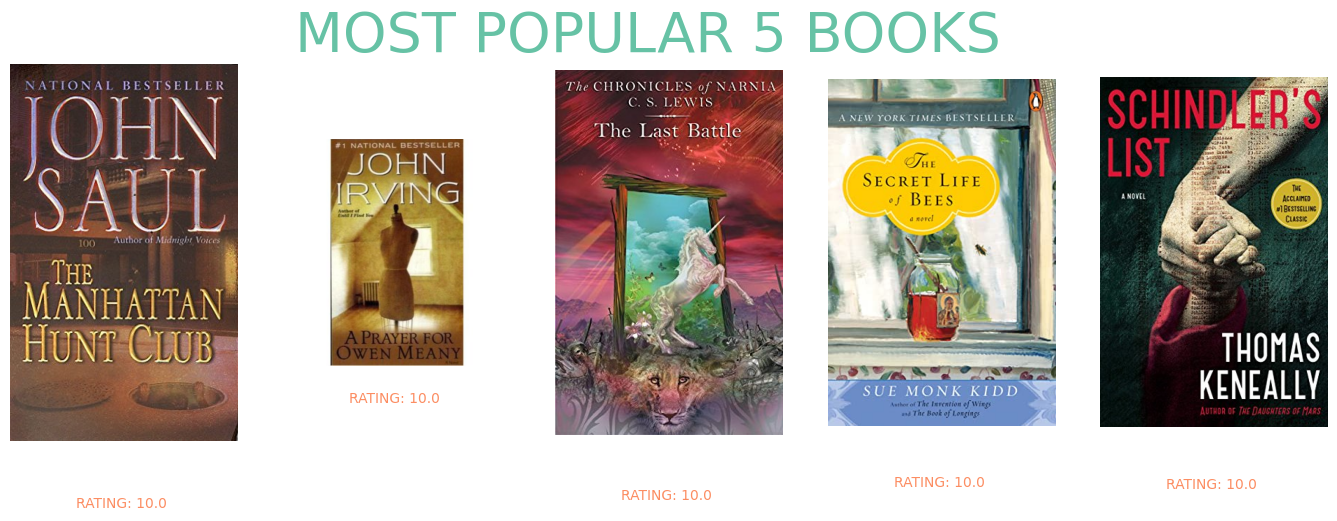

In [138]:
display_popular_books(model_based_recom_test(df_pred=df_pred_nmf, user_id=193458, ratings=rating_explicit))

#### 3) Kmeans


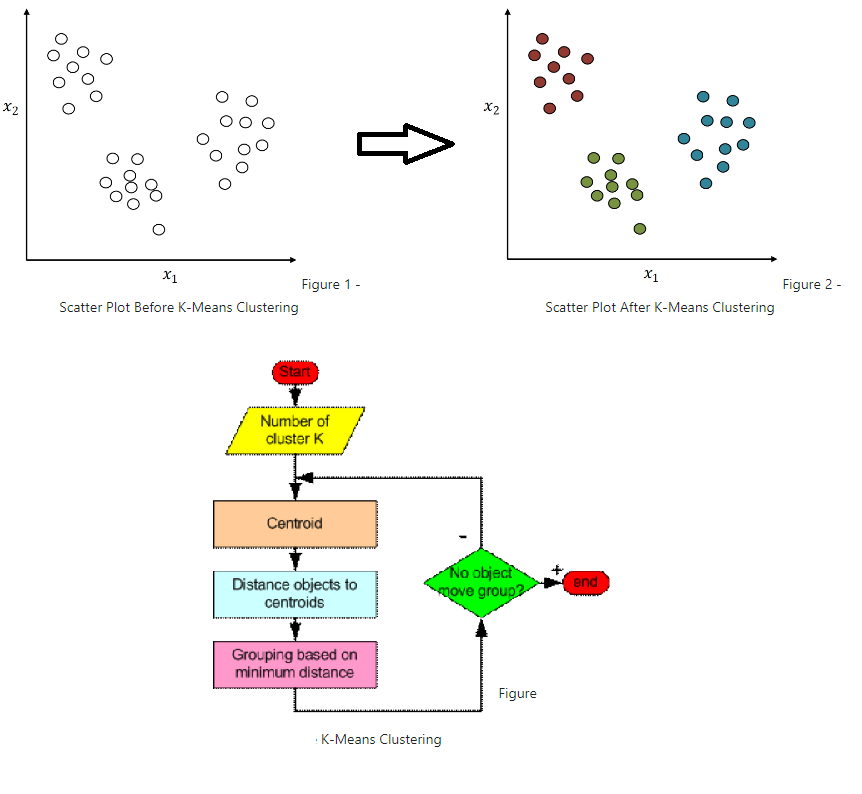

In [199]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [200]:
rating_explicit = rating_explicit[rating_explicit['rating']>7]

In [201]:
rating_explicit.shape[0]

40797

#### Elbow Method
The elbow method is a heuristic method used to determine the optimal number of clusters in a KMeans clustering algorithm. 

The method plots the within-cluster sum of squares (WCSS) as a function of the number of clusters, and the "elbow" or point of inflection in the plot is considered as the optimal number of clusters.

In [227]:
def elbow_method(df, k):
    wcss = []  # Within-Cluster-Sum-of-Squares

    for i in tqdm(range(1, k)):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.plot(range(1, k), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

100%|██████████████████████████████████████████| 19/19 [01:46<00:00,  5.63s/it]


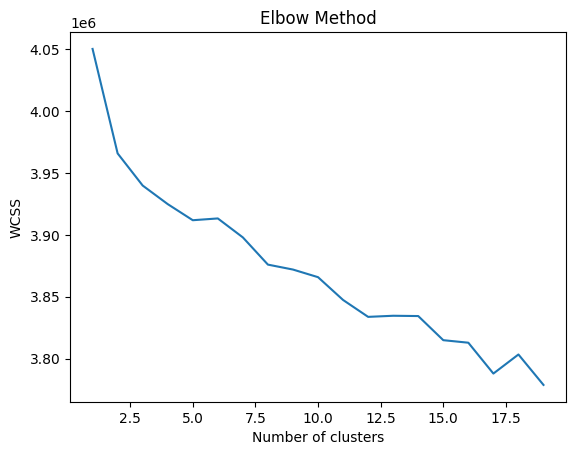

In [228]:
elbow_method(user_item, k=20)

We see that we have to take a large k
we choose $k=20$

In [229]:
from sklearn.model_selection import train_test_split

def kmeans(df, k=20, reduce=False):
    # Implementation de la matrice user_item
    user_item = df.pivot(index='id', columns='ISBN', values='rating')
    user_item.fillna(0, inplace = True)
    user_item = user_item.astype(np.int32)

    if reduce:
        user_item_scaled = reduced_user_item(user_item)

    else:
        # Normaliser les valeurs de la matrice (distance)
        user_item_scaled = (user_item - user_item.mean()) / user_item.std()

    # Split the data 
    train, test = train_test_split(df, test_size=0.2, random_state=42)

    # Entrainement du k-means sur le train
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(user_item_scaled.loc[train['id']])

    # Predict clusters pour le test
    test_clusters = kmeans.predict(user_item_scaled.loc[test['id']])

    # Créer un dictionnaire associant les identifiants d'utilisateurs aux cluster
    user_cluster_dict = dict(zip(user_item_scaled.loc[test['id']].index, kmeans.labels_))

    # Créer une colonne 'cluster'
    test['cluster'] = test['id'].map(user_cluster_dict)

    return test

In [230]:
### Recommendation pour l'utilisateur user_id
def make_recommendations_kmeans(user_id, df, n=5):

    df.rename(columns={'rating':'Score'},inplace=True)

    # Get the cluster of the user
    user_cluster = df.loc[df['id'] == user_id]['cluster'].iloc[0]

    # Get all the ratings for items from users in the same cluster
    item_ratings = df.loc[df['cluster'] == user_cluster].groupby('ISBN')['Score'].mean().reset_index()

    # Sort the items by mean rating in descending order
    item_ratings = item_ratings.sort_values(by='Score', ascending=False)

    # Get the top n items
    top_items = item_ratings.head(n).reset_index(drop=True)

    # Return the top n items as recommendations for the user
    return top_items

In [231]:
rating_cluster = kmeans(df=rating_explicit)

In [232]:
# Afficher les 5 meilleurs recommendation
make_recommendations_kmeans(user_id=277427, df=rating_cluster)

ISBN  Score
0  1931561648   10.0
1  0743411269   10.0
2  0345447840   10.0
3  0345450884   10.0
4  0553258559   10.0

In [233]:
rating_cluster.cluster.value_counts()

user_id_1 = 254

In [234]:
score1 = make_recommendations_kmeans(user_id=user_id_1, df=rating_cluster)
score1

ISBN  Score
0  0060090375   10.0
1  0375701214   10.0
2  0446611867   10.0
3  0446611085   10.0
4  0446610038   10.0

ISBN                              title                author  \
0  0060090375   Lucy Sullivan Is Getting Married          Marian Keyes   
1  0375701214  The Diving Bell and the Butterfly  Jean-Dominique Bauby   
2  0446611867                 A Bend in the Road       Nicholas Sparks   
3  0446611085       Suzanne's Diary for Nicholas       James Patterson   
4  0446610038                         1st to Die       James Patterson   

                   publisher  date  nombre de pages  \
0  William Morrow Paperbacks  2002            628.0   
1  National Geographic Books  1998              0.0   
2               Warner Books  2002              NaN   
3                     Vision  2003            308.0   
4   Grand Central Publishing  2002            492.0   

                                         description  \
0  What happens when a psychic tells Lucy that sh...   
1  A triumphant memoir by the former editor-in-ch...   
2                                               None   
3  Katie Wilkinson has finally found the perfect ...   
4  Four crime-solving friends face off against a ...   

                                         image_links  Score  
0  http://images.amazon.com/images/P/0060090375.0...   10.0  
1  http://images.amazon.com/images/P/0375701214.0...   10.0  
2  http://images.amazon.com/images/P/0446611867.0...   10.0  
3  http://images.amazon.com/images/P/0446611085.0...   10.0  
4  http://images.amazon.com/images/P/0446610038.0...   10.0

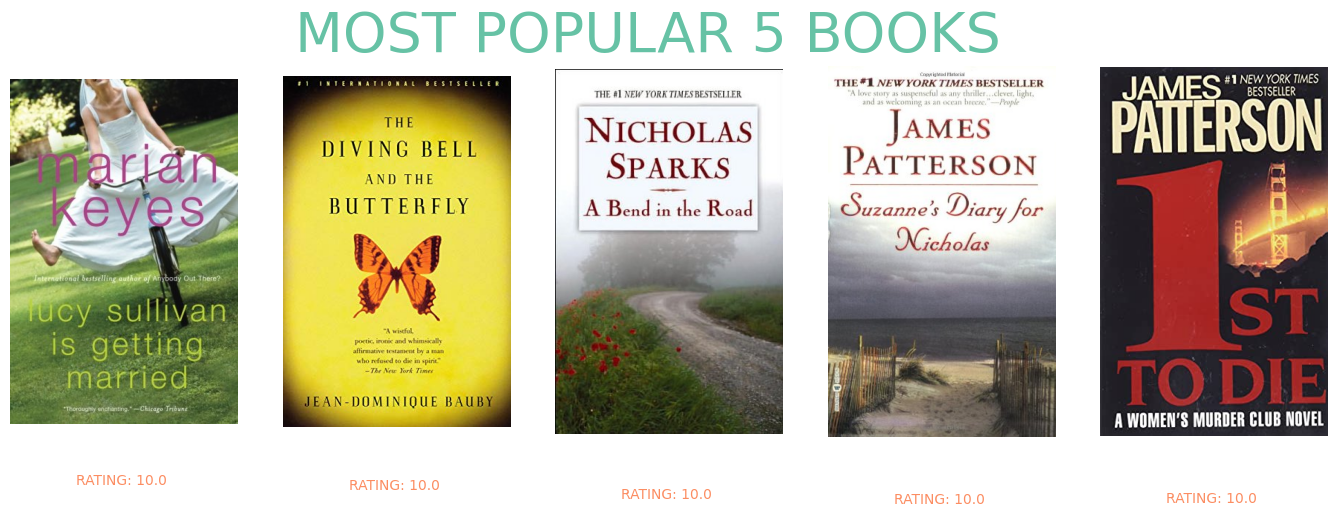

In [235]:
display_popular_books(score1,df=rating_explicit)

#### 4) User-Item Version 2 :  Reduction de dimension

In [236]:
!pip install keras

In [237]:
!pip install tensorflow

The model used for dimentional reduction is an autoencoder.

- Encoder: reduces the dimensionality
- Decoder: reconstructs the input to its original dimensionality.

In [238]:
from keras.layers import Input, Dense
from keras.models import Model

# max_row = user_item.apply(lambda row: np.count_nonzero(row), axis=1).max()
# print("The row with the maximum count contains:", max_row)

def reduced_user_item(user_item, encoding_dim=20):

    n_features = user_item.shape[1]
    X = user_item

    # Define the input shape
    input_shape = (n_features,)

    # Define the input layer
    input_layer = Input(shape=input_shape)

    # Define the encoder layers
    encoder_layers = Dense(encoding_dim, activation='relu')(input_layer)

    # Define the decoder layers
    decoder_layers = Dense(n_features, activation='sigmoid')(encoder_layers)

    # Define the autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoder_layers)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Fit the model to the data
    autoencoder.fit(X, X, epochs=2, batch_size=32)

    # Obtenir les poids de la première couche
    first_layer_weights = autoencoder.layers[1].get_weights()[0]

    # Reduction de la matrice user_item
    X_reduced = X.dot(first_layer_weights)

    # Construction du dataframe
    user_reduced_item = pd.DataFrame(data=X_reduced, index=user_item.index)

    return user_reduced_item

When the model is trained, the weights of the first layer (the encoder) are extracted. These weights are used to project the original user_item matrix into a lower-dimensional space, resulting in a reduced matrix user_reduced_item.

##### Comparaision between the parameter reduce = [True,False]

In [239]:
# False
kmeans(rating_explicit,reduce=False).cluster.value_counts()

17    7408
2      157
1       90
9       74
4       50
19      46
3       44
18      41
13      36
14      34
5       30
6       29
16      25
12      22
15      21
7       15
10      14
11       9
0        9
8        6
Name: cluster, dtype: int64

In [240]:
# True
kmeans(rating_explicit, reduce=True).cluster.value_counts()

Epoch 1/2
91/91 [==============================] - 2s 7ms/step - loss: 0.5217
Epoch 2/2
91/91 [==============================] - 1s 7ms/step - loss: 0.3160


0     1681
8     1348
6     1036
12     918
13     884
4      851
2      378
18     277
1      157
9      106
10      90
19      76
15      74
7       71
3       57
17      46
5       44
16      30
14      22
11      14
Name: cluster, dtype: int64

We can see that using dimensionality reduction has helped to create more evenly distributed clusters

In [241]:
# Compute le dataframe rating_cluster
rating_cluster = kmeans(df=rating_explicit, reduce=True)

Epoch 1/2
91/91 [==============================] - 1s 7ms/step - loss: 0.5004
Epoch 2/2
91/91 [==============================] - 1s 7ms/step - loss: 0.3163


In [242]:
rating_cluster

id        ISBN  rating  Avg_Rating  nbr_ratings_per_book  cluster
348592   83287  0440210690       9    7.647059                    17       17
516197  125039  0451456718       9    8.181818                    11        7
171803   37311  0440225701       8    7.704918                    61       11
574926  138379  0375700757       9    7.705882                    51       18
366995   88122  0425116840       9    7.640000                    25        7
...        ...         ...     ...         ...                   ...      ...
825037  199209  0451452615      10    7.111111                     9       11
203879   46398  0517542099      10    9.125000                     8       12
442472  105979  0452268060       8    7.450000                    20       17
462662  110973  0345409973       8    8.777778                     9        7
839227  203240  038079487x       8    7.660000                    50       17

[8160 rows x 6 columns]

ISBN                              title                author  \
0  0060090375   Lucy Sullivan Is Getting Married          Marian Keyes   
1  0375701214  The Diving Bell and the Butterfly  Jean-Dominique Bauby   
2  0446611867                 A Bend in the Road       Nicholas Sparks   
3  0446611085       Suzanne's Diary for Nicholas       James Patterson   
4  0446610038                         1st to Die       James Patterson   

                   publisher  date  nombre de pages  \
0  William Morrow Paperbacks  2002            628.0   
1  National Geographic Books  1998              0.0   
2               Warner Books  2002              NaN   
3                     Vision  2003            308.0   
4   Grand Central Publishing  2002            492.0   

                                         description  \
0  What happens when a psychic tells Lucy that sh...   
1  A triumphant memoir by the former editor-in-ch...   
2                                               None   
3  Katie Wilkinson has finally found the perfect ...   
4  Four crime-solving friends face off against a ...   

                                         image_links  Score  
0  http://images.amazon.com/images/P/0060090375.0...   10.0  
1  http://images.amazon.com/images/P/0375701214.0...   10.0  
2  http://images.amazon.com/images/P/0446611867.0...   10.0  
3  http://images.amazon.com/images/P/0446611085.0...   10.0  
4  http://images.amazon.com/images/P/0446610038.0...   10.0

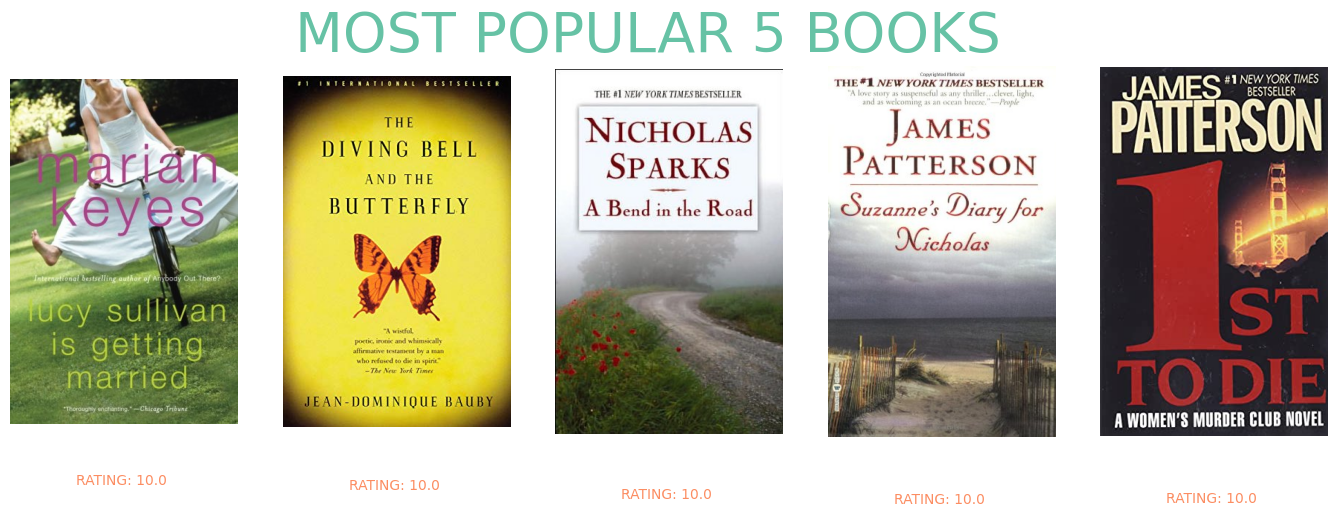

In [243]:
# Afficher les 5 meilleurs recommendation
display_popular_books(make_recommendations_kmeans(user_id=254, df=rating_cluster),df=rating_explicit)

**Conclusion**: 

Our collaborative filtering book recommendation system is an ambitious project that required careful data analysis.

We used various techniques to clean the data and ensure that our recommendation model is accurate and efficient. We are confident that our system will help users discover new books and enhance their reading experience.

We will continue to improve and fine-tune our model to provide an even more personalized recommendation experience to our users.